<a href="https://colab.research.google.com/github/Innanov/Xanadu-Codebook-Solutions/blob/main/Xanadu_Introduction_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Xanadu Codebook Solutions (Introduction) [9-15]

## I.9 Measurements

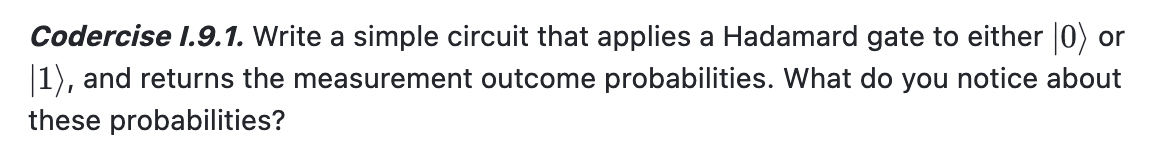

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_h_and_measure(state):
    """Complete the function such that we apply the Hadamard gate
    and measure in the computational basis.
    
    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise leave it in state 0.
    
    Returns:
        array[float]: The measurement outcome probabilities.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY HADAMARD AND MEASURE
    qml.Hadamard(wires=0)
    return qml.probs(wires=0)

print(apply_h_and_measure(0))
print(apply_h_and_measure(1))


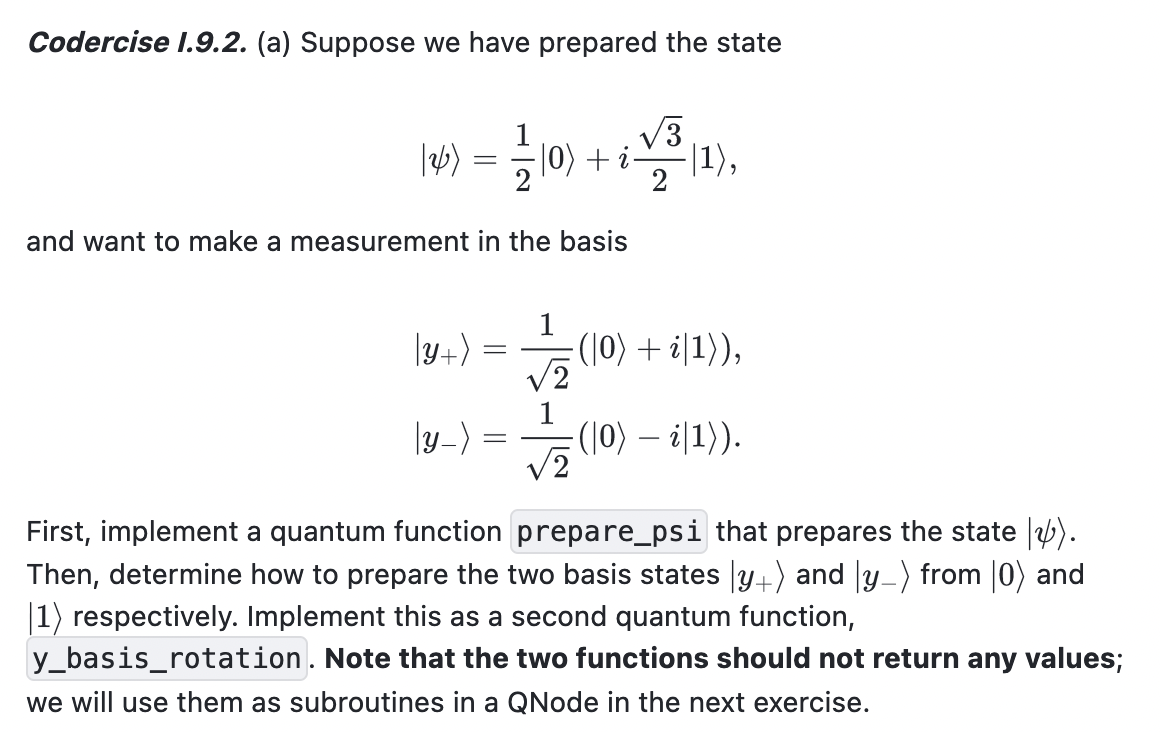

In [ ]:
##################
# YOUR CODE HERE #
##################

# WRITE A QUANTUM FUNCTION THAT PREPARES (1/2)|0> + i(sqrt(3)/2)|1>
def prepare_psi():
    qml.RX(np.pi/3, wires=0)
    qml.PauliX(wires=0)
    #return qml.state()

    



# WRITE A QUANTUM FUNCTION THAT SENDS BOTH |0> TO |y_+> and |1> TO |y_->
def y_basis_rotation():
    qml.Hadamard(wires=0)
    qml.S(wires=0)



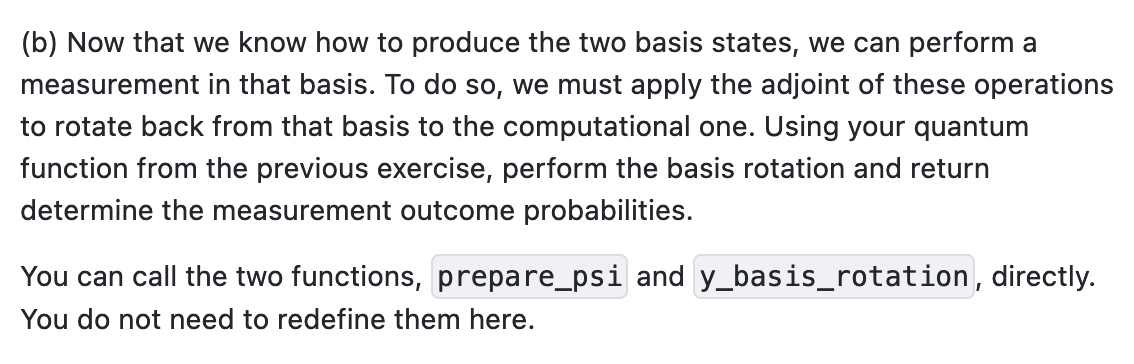

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def measure_in_y_basis():
    ##################
    # YOUR CODE HERE #
    ##################
    
    # PREPARE THE STATE
    prepare_psi()
    # PERFORM THE ROTATION BACK TO COMPUTATIONAL BASIS
    qml.adjoint(y_basis_rotation)()
    # RETURN THE MEASUREMENT OUTCOME PROBABILITIES

    return qml.probs(wires=0)

print(measure_in_y_basis())


## I.10 What did you expect?


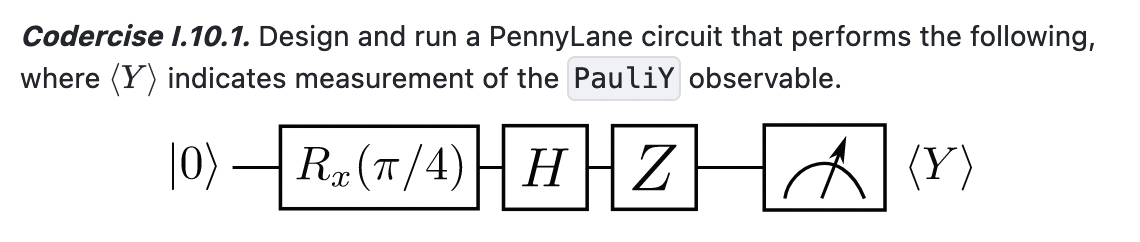

In [ ]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def circuit():
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT IN THE PICTURE AND MEASURE PAULI Y
    qml.RX(np.pi/4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)
    return qml.expval(qml.PauliY(0))

print(circuit())


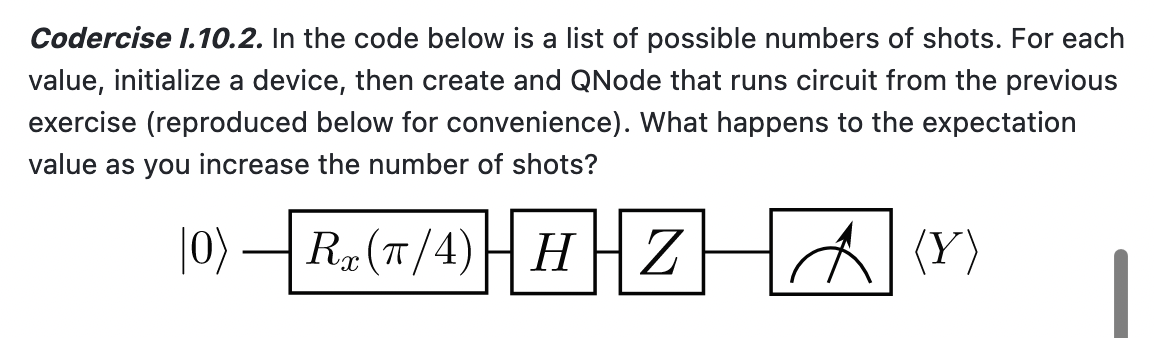

In [ ]:
# An array to store your results
shot_results = []

# Different numbers of shots
shot_values = [100, 1000, 10000, 100000, 1000000]
i = 0

shot_results = [0 for j in shot_values]
print(shot_results)
for i, shots in enumerate(shot_values): 
    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A DEVICE, CREATE A QNODE, AND RUN IT
    dev = qml.device("default.qubit", wires=1, shots=shots)
    
    @qml.qnode(dev)
    def circuit():
        qml.RX(np.pi/4, wires=0)
        qml.Hadamard(wires=0)
        qml.PauliZ(wires=0)
        return qml.expval(qml.PauliY(0))

    # STORE RESULT IN SHOT_RESULTS ARRAY
    shot_results[i] = circuit()
    

print(qml.math.unwrap(shot_results))


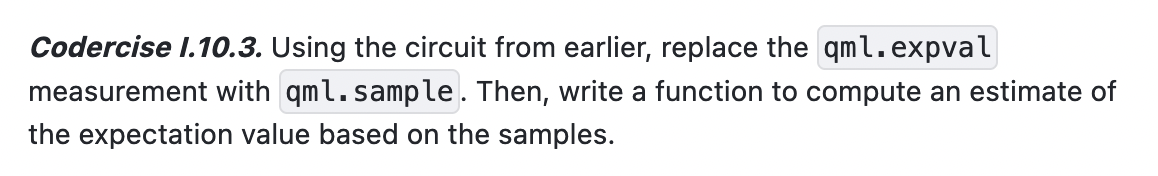

In [ ]:
dev = qml.device("default.qubit", wires=1, shots=100000)

@qml.qnode(dev)
def circuit():
    qml.RX(np.pi/4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # RETURN THE MEASUREMENT SAMPLES OF THE CORRECT OBSERVABLE

    return qml.sample(qml.PauliY(0))


def compute_expval_from_samples(samples):
    """Compute the expectation value of an observable given a set of 
    sample outputs. You can assume that there are two possible outcomes,
    1 and -1. 
    
    Args: 
        samples (array[float]): 100000 samples representing the results of
            running the above circuit.
        
    Returns:
        float: the expectation value computed based on samples.
    """

    estimated_expval = 0

    ##################
    # YOUR CODE HERE #
    ##################

    # USE THE SAMPLES TO ESTIMATE THE EXPECTATION VALUE
    pos = 0.0
    neg = 0.0
    for val in samples:
        if val > 0:
            pos += 1
        else:
            neg += 1
    estimated_expval = (pos + (-1.0)*neg) / (pos+neg)
    return estimated_expval


samples = circuit()
print(compute_expval_from_samples(samples))


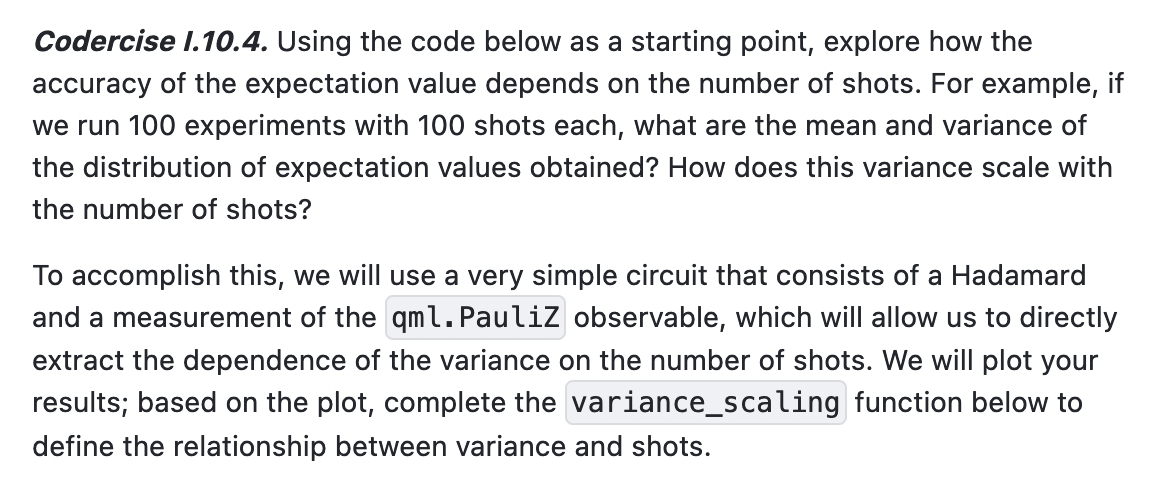

In [ ]:
def variance_experiment(n_shots):
    """Run an experiment to determine the variance in an expectation
    value computed with a given number of shots.
    
    Args:
        n_shots (int): The number of shots
        
    Returns:
        float: The variance in expectation value we obtain running the 
        circuit 100 times with n_shots shots each.
    """

    # To obtain a variance, we run the circuit multiple times at each shot value.
    n_trials = 100

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A DEVICE WITH GIVEN NUMBER OF SHOTS
    dev = qml.device("default.qubit", wires=1, shots=n_shots)
    # DECORATE THE CIRCUIT BELOW TO CREATE A QNODE
    @qml.qnode(dev)
    def circuit():
        qml.Hadamard(wires=0)
        return qml.expval(qml.PauliZ(wires=0))

    # RUN THE QNODE N_TRIALS TIMES AND RETURN THE VARIANCE OF THE RESULTS
    results = np.zeros(n_trials)
    for j in range(n_trials):
        results[j] = circuit()
    return np.var(results)


def variance_scaling(n_shots):
    """Once you have determined how the variance in expectation value scales
    with the number of shots, complete this function to programmatically
    represent the relationship.
    
    Args:
        n_shots (int): The number of shots
        
    Returns:
        float: The variance in expectation value we expect to see when we run
        an experiment with n_shots shots.
    """

    estimated_variance = 0

    ##################
    # YOUR CODE HERE #
    ##################

    # ESTIMATE THE VARIANCE BASED ON SHOT NUMBER
    estimated_variance = 1/n_shots
    return estimated_variance

# Various numbers of shots; you can change this
shot_vals = [10, 20, 40, 100, 200, 400, 1000, 2000, 4000]

# Used to plot your results
results_experiment = [variance_experiment(shots) for shots in shot_vals]
results_scaling = [variance_scaling(shots) for shots in shot_vals]
plot = plotter(shot_vals, results_experiment, results_scaling)


## I.11 Multi-qubit systems

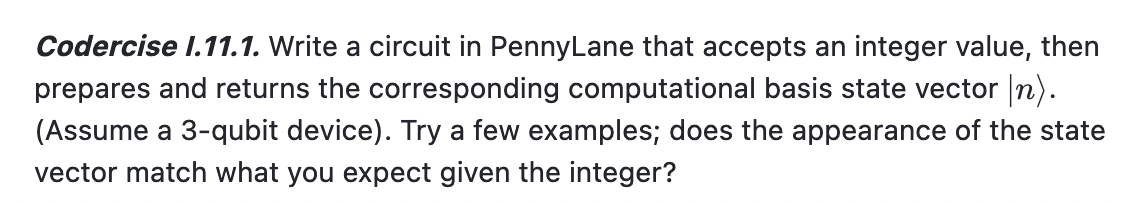

In [ ]:
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def make_basis_state(basis_id):
    """Produce the 3-qubit basis state corresponding to |basis_id>.
    
    Note that the system starts in |000>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.
        
    Returns:
        array[complex]: The computational basis state |basis_id>.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE THE BASIS STATE
    print(np.binary_repr(basis_id, width=3))
    data = np.binary_repr(basis_id, width=3)
    for i, val in enumerate(data):
        if int(val) == 1:
            qml.PauliX(wires=i)
    return qml.state()


basis_id = 3
print(f"Output state = {make_basis_state(basis_id)}")


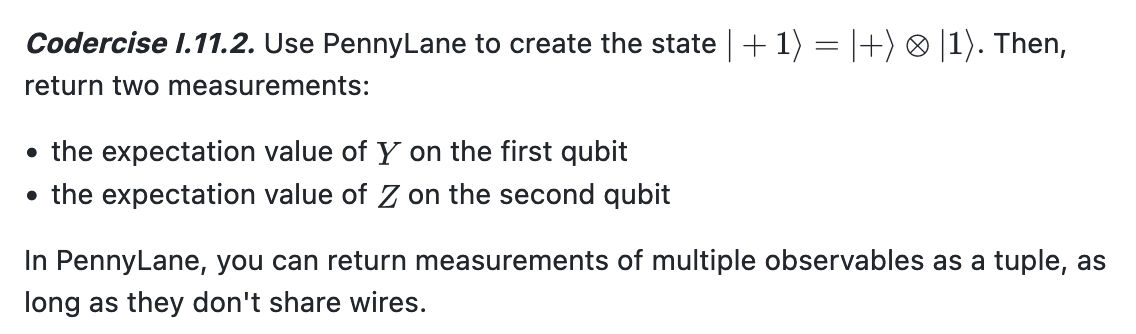

In [ ]:
# Creates a device with *two* qubits
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def two_qubit_circuit():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE |+>|1>
    qml.Hadamard(wires=0)
    qml.PauliX(wires=1)
    # RETURN TWO EXPECTATION VALUES, Y ON FIRST QUBIT, Z ON SECOND QUBIT

    return qml.expval(qml.PauliY(0)), qml.expval(qml.PauliZ(1))


print(two_qubit_circuit())


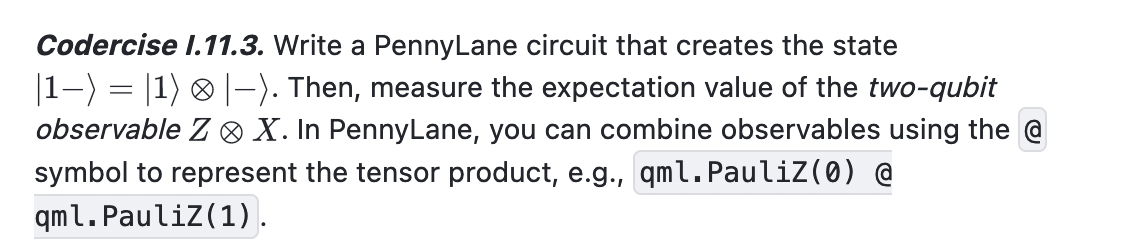

In [ ]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def create_one_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE |1>|->
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.Hadamard(wires=1)
    # RETURN A SINGLE EXPECTATION VALUE Z \otimes X

    return qml.expval(qml.PauliZ(0)@qml.PauliX(1))


print(create_one_minus())


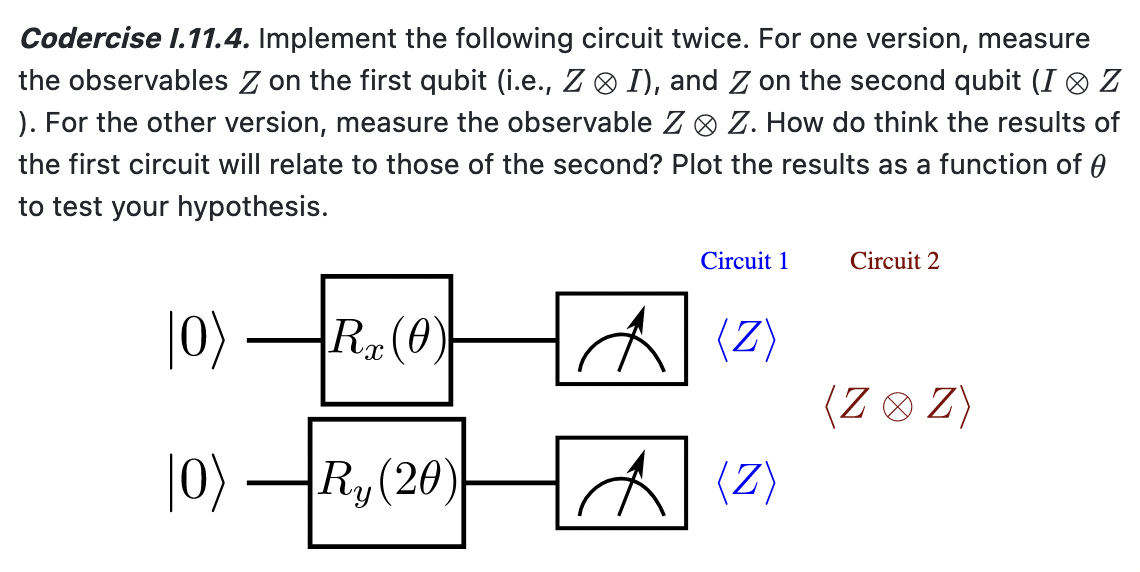

In [ ]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def circuit_1(theta):
    """Implement the circuit and measure Z I and I Z.
    
    Args:
        theta (float): a rotation angle.
        
    Returns:
        float, float: The expectation values of the observables Z I, and I Z
    """
    ##################
    # YOUR CODE HERE #
    ##################  
    qml.RX(theta, wires=0)
    qml.RX(2*theta, wires=1)
    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))


@qml.qnode(dev)
def circuit_2(theta):
    """Implement the circuit and measure Z Z.
    
    Args:
        theta (float): a rotation angle.
        
    Returns:
        float: The expectation value of the observable Z Z
    """ 

    ##################
    # YOUR CODE HERE #
    ##################  
    qml.RX(theta, wires=0)
    qml.RX(2*theta, wires=1)
    return qml.expval(qml.PauliZ(0)@qml.PauliZ(1))


def zi_iz_combination(ZI_results, IZ_results):
    """Implement a function that acts on the ZI and IZ results to
    produce the ZZ results. How do you think they should combine?

    Args:
        ZI_results (array[float]): Results from the expectation value of 
            ZI in circuit_1.
        IZ_results (array[float]): Results from the expectation value of 
            IZ in circuit_2.

    Returns:
        array[float]: A combination of ZI_results and IZ_results that 
        produces results equivalent to measuring ZZ.
    """

    combined_results = np.zeros(len(ZI_results))

    ##################
    # YOUR CODE HERE #
    ##################  
    combined_results = ZI_results*IZ_results
    return combined_results

 
theta = np.linspace(0, 2 * np.pi, 100)

# Run circuit 1, and process the results
circuit_1_results = np.array([circuit_1(t) for t in theta])

ZI_results = circuit_1_results[:, 0]
IZ_results = circuit_1_results[:, 1]
combined_results = zi_iz_combination(ZI_results, IZ_results)

# Run circuit 2
ZZ_results = np.array([circuit_2(t) for t in theta])

# Plot your results
plot = plotter(theta, ZI_results, IZ_results, ZZ_results, combined_results)


## I.12 All tied up

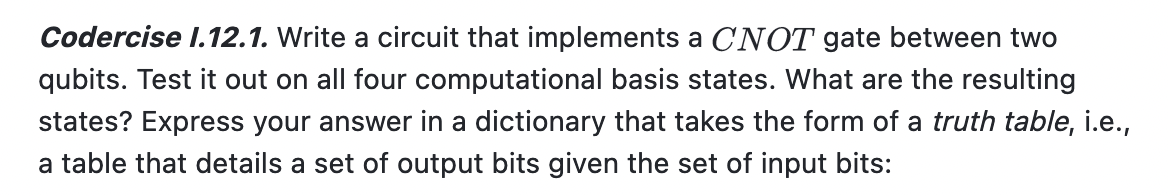

In [ ]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def apply_cnot(basis_id):
    """Apply a CNOT to |basis_id>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.
      
    Returns:
        array[complex]: The resulting state after applying CNOT|basis_id>.
    """

    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=dev.num_wires)]
    qml.BasisStatePreparation(bits, wires=[0, 1])

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE CNOT
    qml.CNOT(wires=[0,1])
    return qml.state()


##################
# YOUR CODE HERE #
##################

# REPLACE THE BIT STRINGS VALUES BELOW WITH THE CORRECT ONES
cnot_truth_table = {
    "00" : "00",
    "01" : "01",
    "10" : "11",
    "11" : "10"
}


# Run your QNode with various inputs to help fill in your truth table
print(apply_cnot(3))


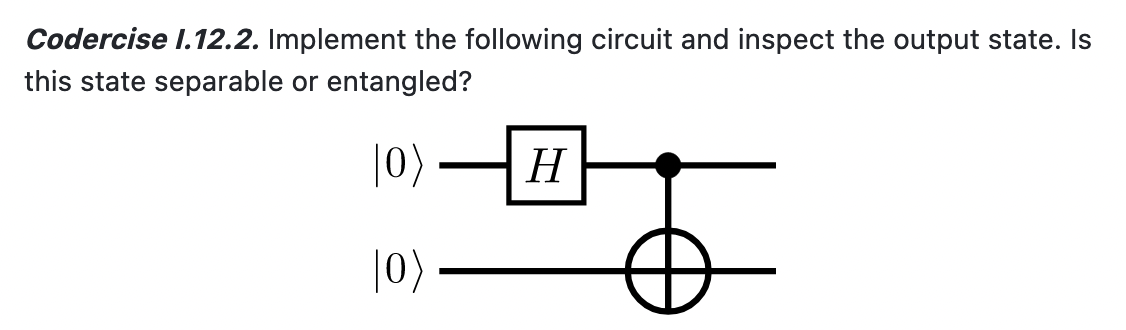

In [ ]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def apply_h_cnot():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE OPERATIONS IN THE CIRCUIT
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.state()


print(apply_h_cnot())

##################
# YOUR CODE HERE #
##################

# SET THIS AS 'separable' OR 'entangled' BASED ON YOUR OUTCOME
state_status = "entangled"


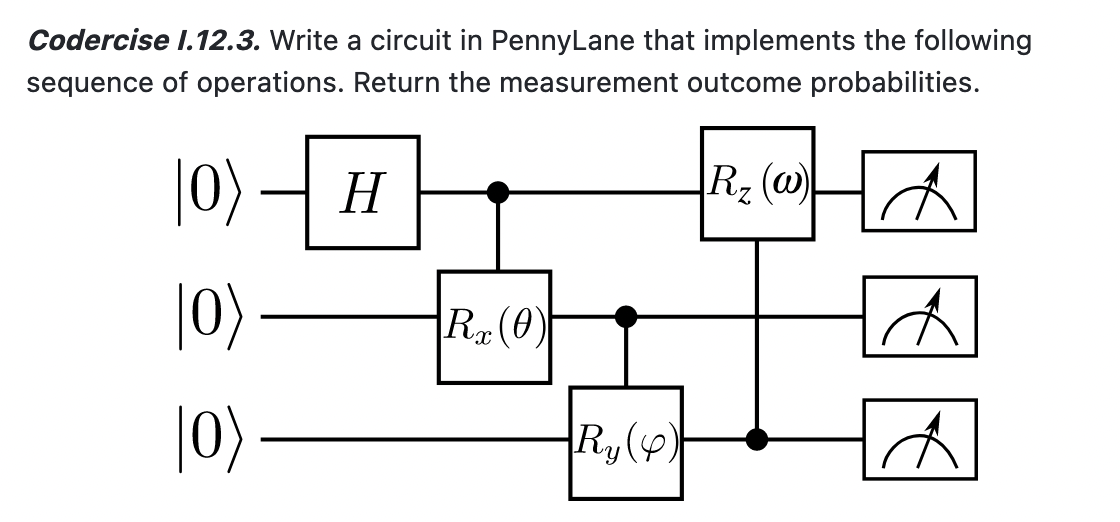

In [ ]:
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def controlled_rotations(theta, phi, omega):
    """Implement the circuit above and return measurement outcome probabilities.

    Args:
        theta (float): A rotation angle
        phi (float): A rotation angle
        omega (float): A rotation angle

    Returns:
        array[float]: Measurement outcome probabilities of the 3-qubit 
        computational basis states.
    """
    
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE OPERATIONS IN THE CIRCUIT AND RETURN MEASUREMENT PROBABILITIES
    qml.Hadamard(wires=0)
    qml.CRX(theta, wires=[0,1])
    qml.CRY(phi, wires=[1,2])
    qml.CRZ(omega, wires=[2,0])
    return qml.probs(wires=[0,1,2])

theta, phi, omega = 0.1, 0.2, 0.3
print(controlled_rotations(theta, phi, omega))


## I.13 We've got it under control

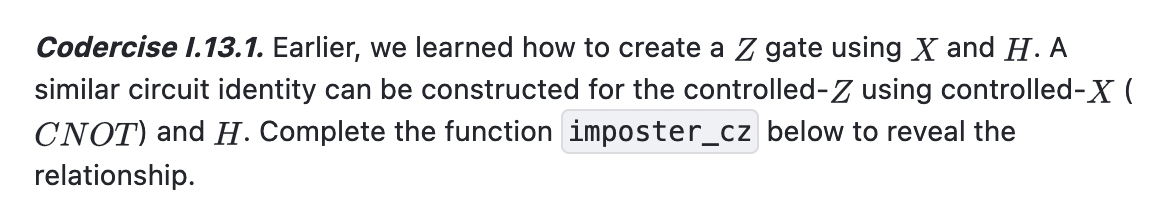

In [ ]:
dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.2, 2.3, 3.4


@qml.qnode(device=dev)
def true_cz(phi, theta, omega):
    prepare_states(phi, theta, omega)
    
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE REGULAR CZ GATE HERE
    qml.CZ(wires=[0,1])
    return qml.state()


@qml.qnode(dev)
def imposter_cz(phi, theta, omega):
    prepare_states(phi, theta, omega)
    
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT CZ USING ONLY H AND CNOT
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0,1])
    qml.Hadamard(wires=1)
    return qml.state()


print(f"True CZ output state {true_cz(phi, theta, omega)}")
print(f"Imposter CZ output state {imposter_cz(phi, theta, omega)}")


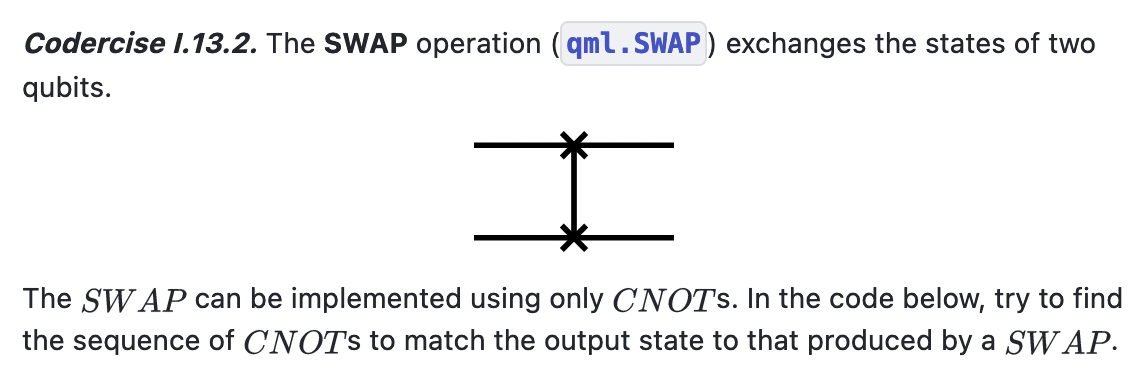

In [ ]:
dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.2, 2.3, 3.4


@qml.qnode(dev)
def apply_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE REGULAR SWAP GATE HERE
    qml.SWAP(wires=[0,1])
    return qml.state()


@qml.qnode(dev)
def apply_swap_with_cnots(phi, theta, omega):
    prepare_states(phi, theta, omega)
    
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE SWAP GATE USING A SEQUENCE OF CNOTS
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,0])
    qml.CNOT(wires=[0,1])
    return qml.state()


print(f"Regular SWAP state = {apply_swap(phi, theta, omega)}")
print(f"CNOT SWAP state = {apply_swap_with_cnots(phi, theta, omega)}")


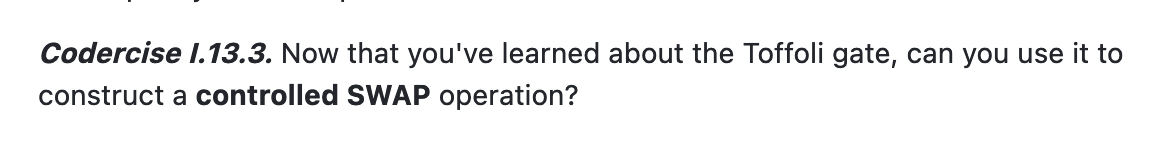

In [ ]:
dev = qml.device("default.qubit", wires=3)

# Prepare first qubit in |1>, and arbitrary states on the second two qubits
phi, theta, omega = 1.2, 2.3, 3.4


# A helper function just so you can visualize the initial state
# before the controlled SWAP occurs.
@qml.qnode(dev)
def no_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)
    return qml.state()


@qml.qnode(dev)
def controlled_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)
    
    ##################
    # YOUR CODE HERE #
    ##################

    # PERFORM A CONTROLLED SWAP USING A SEQUENCE OF TOFFOLIS
    qml.Toffoli(wires = [0,1,2])
    qml.Toffoli(wires = [0,2,1])
    qml.Toffoli(wires = [0,1,2])
    return qml.state()


print(no_swap(phi, theta, omega))
print(controlled_swap(phi, theta, omega))


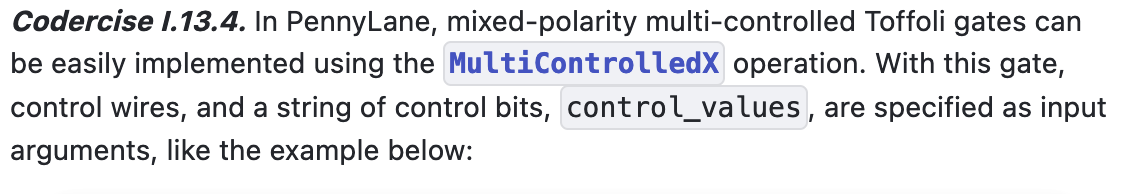

In [ ]:
dev = qml.device('default.qubit', wires=4)

@qml.qnode(dev)
def four_qubit_mcx():
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT ABOVE USING A 4-QUBIT MULTI-CONTROLLED X
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    qml.MultiControlledX(control_wires=[0,1,2], wires=3, control_values="001")
    return qml.state()


print(four_qubit_mcx())


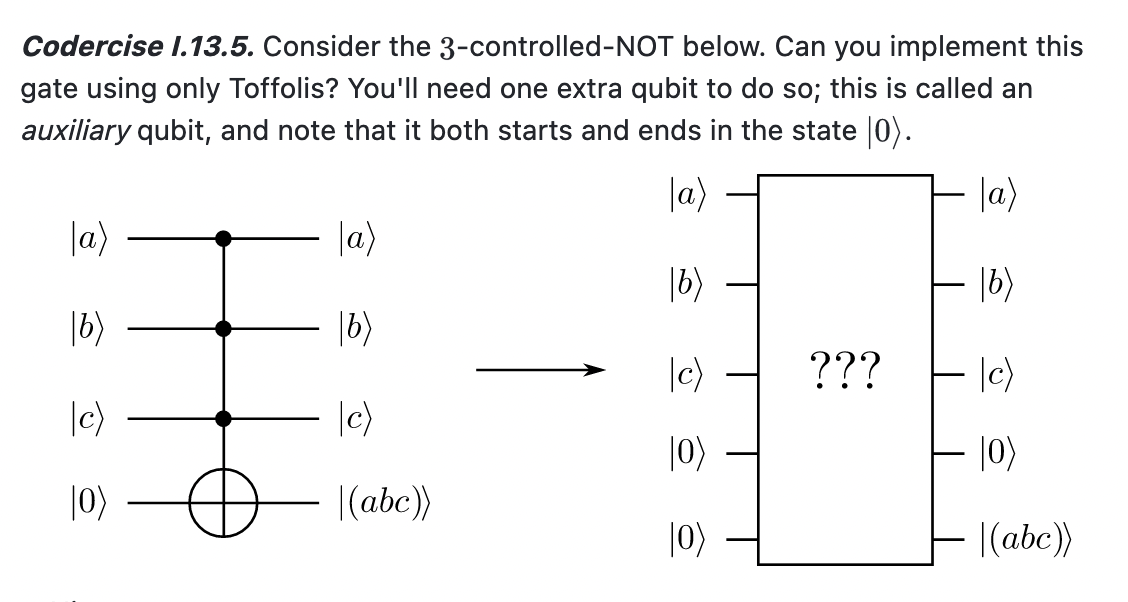

In [ ]:
# Wires 0, 1, 2 are the control qubits
# Wire 3 is the auxiliary qubit
# Wire 4 is the target 
dev = qml.device('default.qubit', wires=5)


@qml.qnode(dev)
def four_qubit_mcx_only_tofs():
    # We will initialize the control qubits in state |1> so you can see
    # how the output state gets changed.
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.PauliX(wires=2)

    ##################
    # YOUR CODE HERE #
    ##################
    
    # IMPLEMENT A 3-CONTROLLED NOT WITH TOFFOLIS
    qml.Toffoli(wires = [0,1,3])
    qml.Toffoli(wires = [2,3,4])
    qml.Toffoli(wires = [0,1,3])
    return qml.state()


#print(four_qubit_mcx_only_tofs())


## I.14 Multi-qubit gate challenge

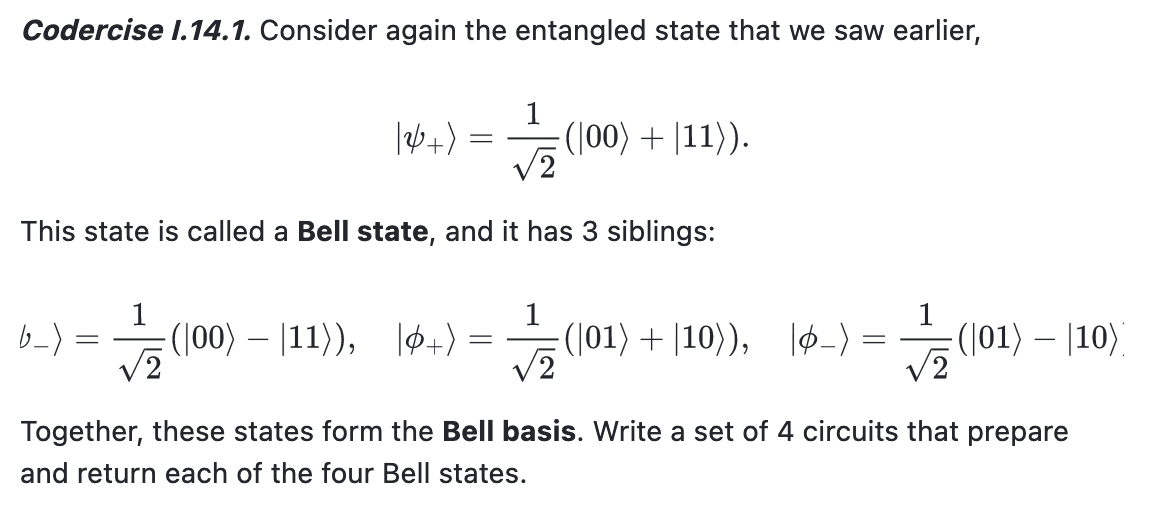

In [ ]:
dev = qml.device('default.qubit', wires=2)

# Starting from the state |00>, implement a PennyLane circuit
# to construct each of the Bell basis states.

@qml.qnode(dev)
def prepare_psi_plus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE (1/sqrt(2)) (|00> + |11>)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.state()


@qml.qnode(dev)
def prepare_psi_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE (1/sqrt(2)) (|00> - |11>)
    
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.state()


@qml.qnode(dev)
def prepare_phi_plus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE  (1/sqrt(2)) (|01> + |10>)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    qml.PauliX(wires=0)
 
    return qml.state()


@qml.qnode(dev)
def prepare_phi_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE  (1/sqrt(2)) (|01> - |10>)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    qml.PauliX(wires=0)
    qml.PauliZ(wires=0)
    return qml.state()


psi_plus = prepare_psi_plus()
psi_minus = prepare_psi_minus()
phi_plus = prepare_phi_plus()
phi_minus = prepare_phi_minus()

# Uncomment to print results
#print(f"|ψ_+> = {psi_plus}")
print(f"|ψ_-> = {psi_minus}")
#print(f"|ϕ_+> = {phi_plus}")
#print(f"|ϕ_-> = {phi_minus}")


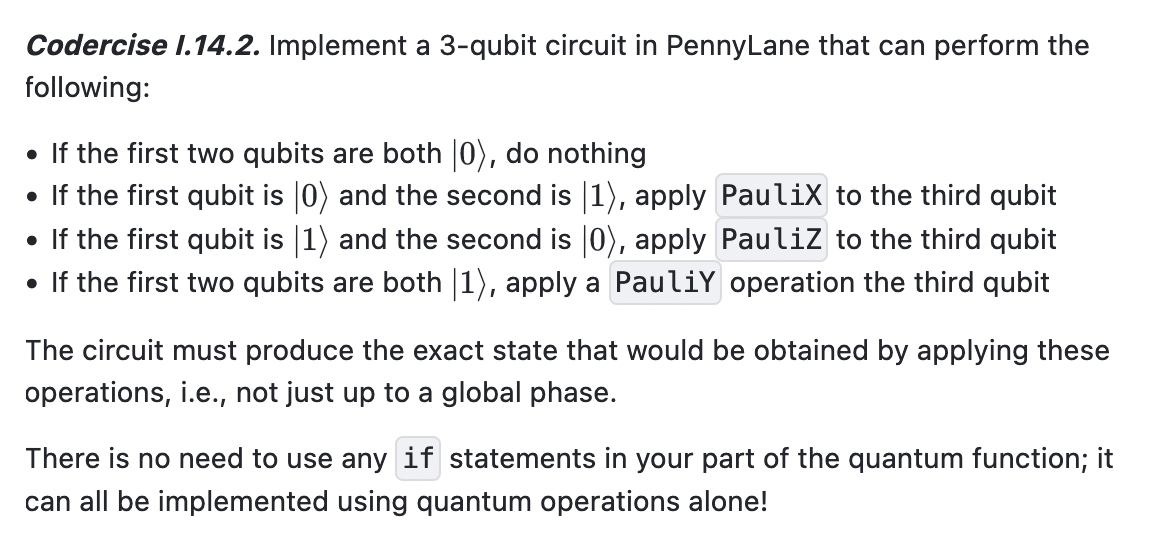

In [ ]:
dev = qml.device("default.qubit", wires=3)

# State of first 2 qubits
state = [0, 1]


Z = np.matrix([[1,0], [0,-1]])
Y = np.matrix([[0,-1j],[1j,0]])
@qml.qnode(device=dev)
def apply_control_sequence(state):
    # Set up initial state of the first two qubits
    if state[0] == 1:
        qml.PauliX(wires=0)
    if state[1] == 1:
        qml.PauliX(wires=1) 

    # Set up initial state of the third qubit - use |->
    # so we can see the effect on the output
    qml.PauliX(wires=2)
    qml.Hadamard(wires=2)
    
    ##################
    # YOUR CODE HERE #
    ##################
    
    # IMPLEMENT THE MULTIPLEXER
    # IF STATE OF FIRST TWO QUBITS IS 01, APPLY X TO THIRD QUBIT
    qml.PauliX(wires=0)
    qml.Toffoli(wires=[0,1,2])
    qml.PauliX(wires=0)
    # IF STATE OF FIRST TWO QUBITS IS 10, APPLY Z TO THIRD QUBIT
    qml.PauliX(wires=1)
    qml.Hadamard(wires=2)
    qml.Toffoli(wires=[0,1,2])
    qml.PauliX(wires=1)
    qml.Hadamard(wires=2)
    # IF STATE OF FIRST TWO QUBITS IS 11, APPLY Y TO THIRD QUBIT
    qml.adjoint(qml.S)(wires=2)
    qml.Toffoli(wires=[0,1,2])
    qml.S(wires=2)
    return qml.state()
    

print(apply_control_sequence(state))


## I.15 Quantum teleportation

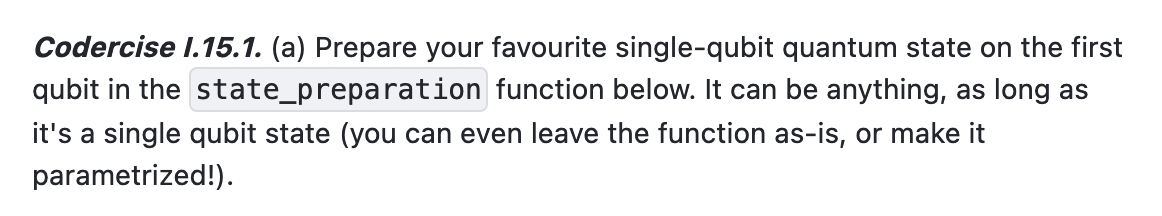

In [ ]:
def state_preparation():
    ##################
    # YOUR CODE HERE #
    ##################

    # OPTIONALLY UPDATE THIS STATE PREPARATION ROUTINE

    qml.Hadamard(wires=0)
    qml.Rot(0.1, 0.2, 0.3, wires=0)


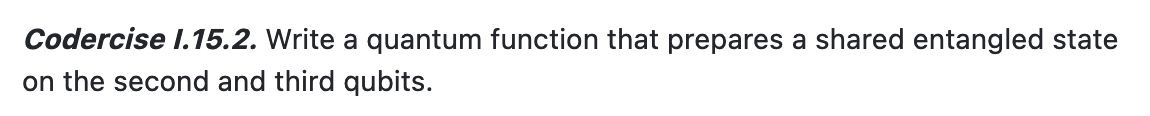

In [ ]:
def entangle_qubits():
    ##################
    # YOUR CODE HERE #
    ##################

    # ENTANGLE THE SECOND QUBIT (WIRES=1) AND THE THIRD QUBIT
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[1,2])


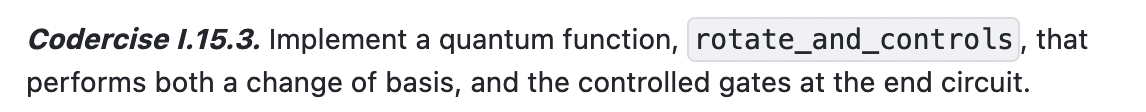

In [ ]:
def rotate_and_controls():
    ##################
    # YOUR CODE HERE #
    ##################

    # PERFORM THE BASIS ROTATION
    qml.CNOT(wires=[0,1])
    qml.Hadamard(wires=0)

    # PERFORM THE CONTROLLED OPERATIONS
    qml.CNOT(wires=[1,2])
    qml.CZ(wires=[0,2])



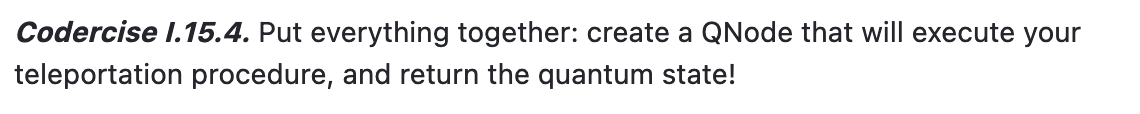

In [ ]:
dev = qml.device("default.qubit", wires=3)

##################
# YOUR CODE HERE #
##################

# OPTIONALLY UPDATE THIS STATE PREPARATION ROUTINE
def state_preparation():
    qml.Hadamard(wires=0)
    qml.Rot(0.1, 0.2, 0.3, wires=0)


@qml.qnode(dev)
def teleportation():
    ##################
    # YOUR CODE HERE #
    ##################

    # USE YOUR QUANTUM FUNCTIONS TO IMPLEMENT QUANTUM TELEPORTATION
    state_preparation()
    entangle_qubits()
    rotate_and_controls()
    # RETURN THE STATE
    return qml.state()

print(teleportation())


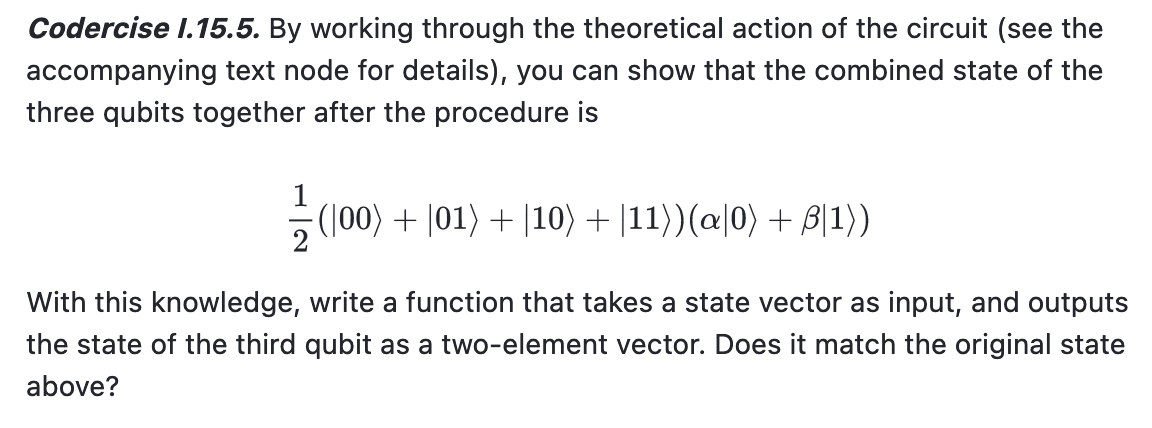

In [ ]:
def extract_qubit_state(input_state):
    """Extract the state of the third qubit from the combined state after teleportation.
    
    Args:
        input_state (array[complex]): A 3-qubit state of the form 
            (1/2)(|00> + |01> + |10> + |11>) (a|0> + b|1>)
            obtained from the teleportation protocol.
            
    Returns:
        array[complex]: The state vector np.array([a, b]) of the third qubit.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # DETERMINE THE STATE OF THE THIRD QUBIT
    return [2*input_state[0], 2*input_state[1]]
    

# Here is the teleportation routine for you
dev = qml.device("default.qubit", wires=3)

#################
# YOUR CODE HERE #
##################

# OPTIONALLY UPDATE THIS STATE PREPARATION ROUTINE
def state_preparation():
    qml.Hadamard(wires=0)
    qml.Rot(0.1, 0.2, 0.3, wires=0)


@qml.qnode(dev)
def teleportation():
    state_preparation()
    entangle_qubits()
    rotate_and_controls()    
    return qml.state()

# Print the extracted state after teleportation
full_state = teleportation()
print(extract_qubit_state(full_state))
